In [104]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from common import collect_results, normalize_region_name
from pathlib import Path
from matplotlib import pyplot as plt

In [105]:
ROOT = Path("./ycsb")

def get_matcher(prefix):
    def matcher(p: Path):   
        import re
        pattern = re.compile(prefix + r"-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(1))
        return {
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(2)),
            "mr": int(match.group(3)),
            "suffix": str(match.group(4)),
        }
    
    return matcher

# Throughput & Error


Collect the results

In [148]:
SYSTEMS = ["sunstorm", "aurora-global", "aurora-eventual", "yugabyte"]
# SYSTEMS = ["sunstorm", "aurora", "yugabyte"]
HOTS = [100000, 1000]
RENEW_CACHE = False

# RMW


aurora_matcher = get_matcher("ycsb-throughput-aurora")
aurora_throughput_df = collect_results(
    ROOT / "throughput-aurora",
    aurora_matcher,
    RENEW_CACHE,
)
# aurora_throughput_df["system"] = "aurora"
aurora_throughput_df["system"] = "aurora-global"

aurora_matcher = get_matcher("ycsb-throughput-aurora-eventual")
aurora_eventual_throughput_df = collect_results(
    ROOT / "throughput-aurora-eventual",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_eventual_throughput_df["system"] = "aurora-eventual"


rmw_aurora_matcher = get_matcher("ycsb-throughput-aurora")
rmw_aurora_throughput_df = collect_results(
    ROOT / "rmw-aurora",
    rmw_aurora_matcher,
    RENEW_CACHE,
)

rmw_aurora_matcher = get_matcher("ycsb-throughput-aurora")
rmw_aurora_eventual_throughput_df = collect_results(
    ROOT / "rmw-aurora-eventual",
    rmw_aurora_matcher,
    RENEW_CACHE,
)

rmw_yugabyte_matcher = get_matcher("ycsb-throughput-yugabyte")
rmw_yugabyte_throughput_df = collect_results(
    ROOT / "rmw-yugabyte",
    rmw_yugabyte_matcher,
    RENEW_CACHE,
)

# Read-Heavy

read_heavy_sunstorm_matcher = get_matcher("ycsb-mixed-sunstorm")
read_heavy_sunstorm_throughput_df = collect_results(
    ROOT / "read-heavy-sunstorm",
    read_heavy_sunstorm_matcher,
    RENEW_CACHE,
)

read_heavy_aurora_matcher = get_matcher("ycsb-mixed-aurora")
read_heavy_aurora_throughput_df = collect_results(
    ROOT / "read-heavy-aurora",
    read_heavy_aurora_matcher,
    RENEW_CACHE,
)

read_heavy_aurora_matcher = get_matcher("ycsb-mixed-aurora")
read_heavy_aurora_eventual_throughput_df = collect_results(
    ROOT / "read-heavy-aurora-eventual",
    read_heavy_aurora_matcher,
    RENEW_CACHE,
)

read_heavy_yugabyte_matcher = get_matcher("ycsb-mixed-yugabyte")
read_heavy_yugabyte_throughput_df = collect_results(
    ROOT / "read-heavy-yugabyte",
    read_heavy_yugabyte_matcher,
    RENEW_CACHE,
)

# Read-Only

read_only_sunstorm_matcher = get_matcher("ycsb-read-only-sunstorm")
read_only_sunstorm_throughput_df = collect_results(
    ROOT / "read-only-sunstorm",
    read_only_sunstorm_matcher,
    RENEW_CACHE,
)

read_only_aurora_matcher = get_matcher("ycsb-read-only-aurora")
read_only_aurora_throughput_df = collect_results(
    ROOT / "read-only-aurora",
    read_only_aurora_matcher,
    RENEW_CACHE,
)

read_only_aurora_matcher = get_matcher("ycsb-read-only-aurora")
read_only_aurora_eventual_throughput_df = collect_results(
    ROOT / "read-only-aurora-eventual",
    read_only_aurora_matcher,
    RENEW_CACHE,
)

read_only_yugabyte_matcher = get_matcher("ycsb-read-only-yugabyte")
read_only_yugabyte_throughput_df = collect_results(
    ROOT / "read-only-yugabyte",
    read_only_yugabyte_matcher,
    RENEW_CACHE,
)


Combine the results

## Throughput

In [230]:
throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    aurora_eventual_throughput_df,
    yugabyte_throughput_df,
])
throughput_df["HOT"] = throughput_df["hot"]
throughput_df["workload"] = "100% Writes"
normalize_region_name(throughput_df)
throughput_df

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,rejected.WorkloadF2,rejected.WorkloadF3,...,other_aborts,deadlock,throughput,throughput.WorkloadF3,throughput.WorkloadF1,unexpected.WorkloadF2,unexpected.WorkloadF3,system,unexpected.WorkloadF1,HOT
0,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,1-us-east-1-0,100000,100% Writes,10,20240430-153607,1064,560,419.0,85.0,...,598,0,5208.286832,74.0,4698.3,NaN,NaN,sunstorm,NaN,100000
1,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,2-eu-west-1-0,100000,100% Writes,10,20240430-153607,1064,584,388.0,92.0,...,617,0,4575.755323,63.4,4103.3,NaN,NaN,sunstorm,NaN,100000
2,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,3-ap-northeast-1-0,100000,100% Writes,10,20240430-153607,1174,560,507.0,107.0,...,598,0,3934.176440,55.4,3535.2,NaN,NaN,sunstorm,NaN,100000
3,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,1-us-east-1-0,10000,100% Writes,50,20240430-161215,3402,502,2246.0,654.0,...,1032,0,1726.062443,123.4,856.2,NaN,NaN,sunstorm,NaN,10000
4,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,2-eu-west-1-0,10000,100% Writes,50,20240430-161215,3229,477,2112.0,640.0,...,959,0,1434.814092,100.4,719.0,NaN,NaN,sunstorm,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,2-eu-west-1-0,1000,100% Writes,0,20240501-110250,45280,45280,NaN,NaN,...,45280,0,1863.080996,NaN,2361.2,NaN,NaN,yugabyte,NaN,1000
56,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,3-ap-northeast-1-0,1000,100% Writes,0,20240501-110250,37823,37823,NaN,NaN,...,37823,0,1907.240574,NaN,2326.4,NaN,NaN,yugabyte,NaN,1000
57,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,1-us-east-1-0,1000,100% Writes,5,20240501-110250,41530,35286,5246.0,998.0,...,41530,0,1725.680609,15.5,2077.5,NaN,NaN,yugabyte,NaN,1000
58,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,2-eu-west-1-0,1000,100% Writes,5,20240501-110250,30664,24826,4950.0,888.0,...,30664,0,1642.895334,13.1,1853.5,NaN,NaN,yugabyte,NaN,1000


Compute the error rates

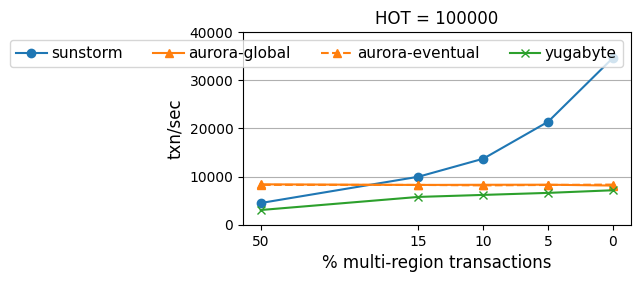

In [160]:
columns = ['ood_index_page', 'ood_tuple', 'other_aborts', 'ood_table', 'deadlock', 'completed'] 
error_df = throughput_df.groupby(["workload","hot", "system", "mr"]).sum()[columns]
error_df["outdated index page"] = error_df["ood_index_page"] / error_df["completed"] * 100
error_df["outdated table"] = error_df["ood_table"] / error_df["completed"] * 100
error_df["outdated tuple"] = error_df["ood_tuple"] / error_df["completed"] * 100
error_df["other aborts"] = error_df["other_aborts"] / error_df["completed"] * 100
error_df["deadlock"] = error_df["deadlock"] / error_df["completed"] * 100
error_df["pct"] = error_df["deadlock"] + error_df["outdated index page"] + error_df["outdated table"] + error_df["outdated tuple"] + error_df["other aborts"]
error_df.loc[("RMW")] # type: ignore

Create plots for RMW and Read-Heavy

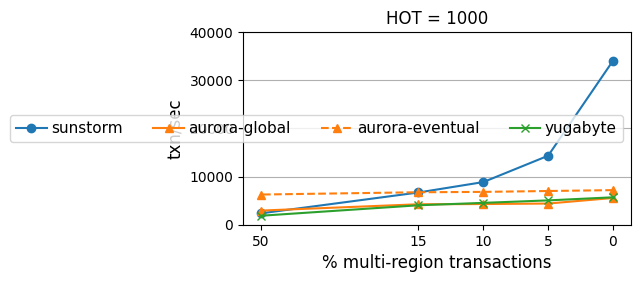

In [7]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec

for hot in HOTS:
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = hot
    # Print hot_df when "mr" is 0
    ax = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="throughput", aggfunc="sum"
    )[SYSTEMS].plot(
        title=f"HOT = {hot_label}",
        xlabel="% multi-region transactions",
        ylabel="txn/sec",
        figsize=(5, 2.5),
        style=["o-", "^-", "^--", "x-"],
        color=["C0", "C1", "C1", "C2"],
        ylim=(0, 40000),
        rot=0,
    )
    ax.set_xscale("symlog", linthresh=20)
    ax.set_xticks([0, 5, 10, 15, 50])
    ax.set_xticklabels([0, 5, 10, 15, 50])
    ax.margins(x=0.05)
    ax.grid(axis="y")
    ax.legend(title="", ncol=4, handletextpad=0.3)
    ax.invert_xaxis()
    #plt.savefig(f"output/micro-throughput-hot{hot}.pdf", bbox_inches="tight")


Plot for Read-only

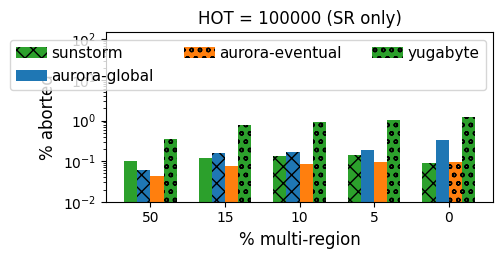

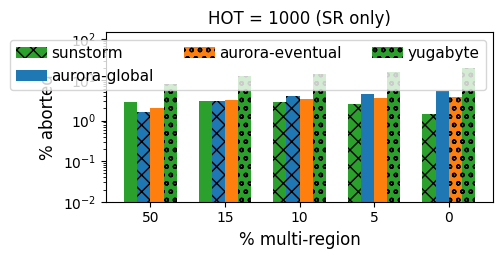

In [110]:
from matplotlib.lines import Line2D

FONT_SIZE_AXES = 13
FONT_SIZE_LEGEND = 12

    hot_label = hot
    ax = ratio_df[reversed(SYSTEMS)].plot.bar(
        title=f"HOT = {hot_label} (SR only)",
        xlabel="% multi-region",
        ylabel="% aborted",
        figsize=(5, 2.2),
        rot=0,
        width=0.7,
        color=["C2", "C1", "C0"],
    )
    bars = ax.patches
    patterns = ["oo", "", "xx"]
    hatches = [p for p in patterns for _ in range(len(bars) // len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(reversed(legend_handles), reversed(legend_labels), title="", ncol=3, handletextpad=0.3)
    ax.invert_xaxis()
    
    ax.margins(y=0.4)
    # plt.savefig(f"output/micro-abort-sr-hot{hot}.pdf", bbox_inches="tight")

    ax.set_yscale("log")
    ax.set_ylim(0.01, 150)
    # plt.savefig(f"output/micro-abort-sr-hot{hot}-logy.pdf", bbox_inches="tight")

# Latency

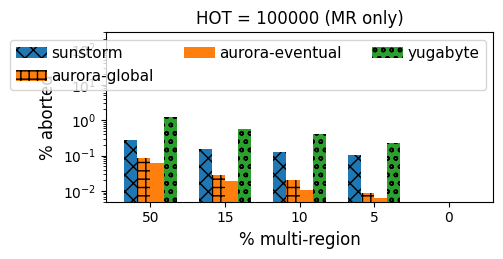

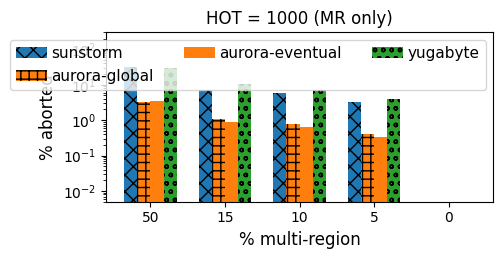

In [159]:
fig, axes = plt.subplots(4, 3, figsize=(10, 8), sharey=True)

for hot in HOTS:
    hot_df = throughput_df[throughput_df.hot == hot]
    rejected_2_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="rejected.WorkloadF2", aggfunc="sum"
    )
    rejected_3_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="rejected.WorkloadF3", aggfunc="sum"
    )
    completed_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="completed", aggfunc="sum"
    )
    aborted_df = rejected_2_df + rejected_3_df
    ratio_df = aborted_df / (aborted_df + completed_df) * 100
    hot_label = hot
    ax = ratio_df[reversed(SYSTEMS)].plot.bar(
        title=f"HOT = {hot_label} (MR only)",
        xlabel="% multi-region",
        ylabel="% aborted",
        figsize=(5, 2.2),
        rot=0,
        width=0.7,
        color=["C2", "C1", "C1", "C0"],
    )
    bars = ax.patches
    patterns = ["oo", "", "++", "xx"]
    hatches = [p for p in patterns for _ in range(len(bars) // len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch, )

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(reversed(legend_handles), reversed(legend_labels), title="", ncol=3, handletextpad=0.3)
    ax.invert_xaxis()

    ax.margins(y=0.3)
    # plt.savefig(f"output/micro-abort-mr-hot{hot}.pdf", bbox_inches="tight")

    ax.set_yscale("log")
    ax.set_ylim(0.005, 300)
    # plt.savefig(f"output/micro-abort-mr-hot{hot}-logy.pdf", bbox_inches="tight")



## SunStorm error types

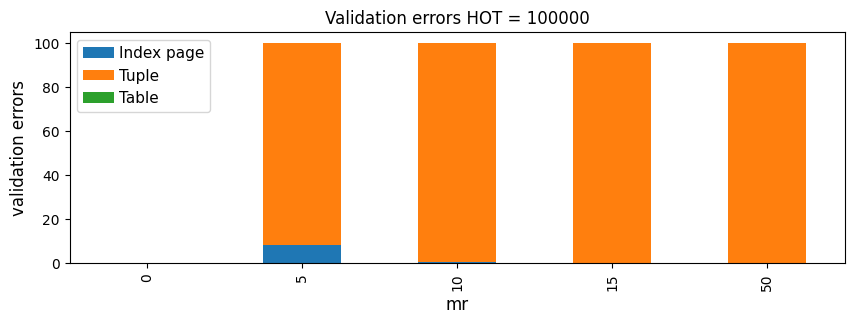

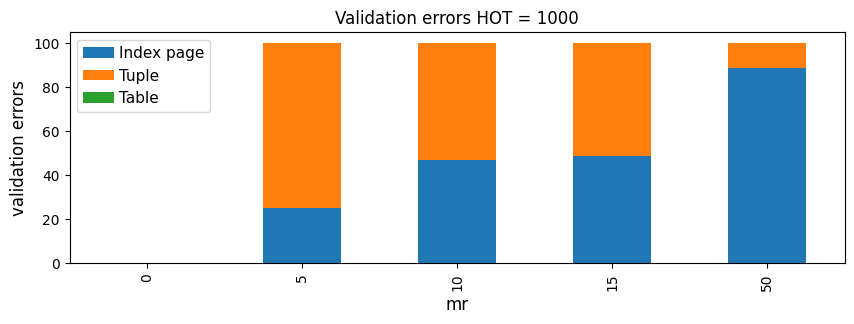

In [112]:
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

sunstorm_df = throughput_df[throughput_df.system == "sunstorm"]
for hot in HOTS:
    hot_df = sunstorm_df[sunstorm_df.hot == hot]\
        .groupby(["mr"])\
        .sum()
    mh_aborts = hot_df["ood_tuple"] + hot_df["ood_index_page"]  + hot_df["ood_table"]
    hot_df["ood_index_page_pct"] = hot_df["ood_index_page"] / mh_aborts * 100
    hot_df["ood_tuple_pct"] = hot_df["ood_tuple"] / mh_aborts * 100
    hot_df["ood_table_pct"] = hot_df["ood_table"] / mh_aborts * 100
    ax = hot_df[["ood_index_page_pct", "ood_tuple_pct", "ood_table_pct"]].plot.bar( 
        title="Validation errors HOT = " + str(hot),
        ylabel="validation errors",
        figsize=(10, 3),
        stacked=True,
    )
    ax.legend(["Index page", "Tuple", "Table"], title="", ncol=1, handletextpad=0.3)
    


In [233]:
error_columns = ['ood_index_page', 'ood_tuple', 'other_aborts'] 
error_df = throughput_df.groupby(["hot", "system", "mr"]).sum()[error_columns + ['ood_table', 'deadlock', 'completed']]
error_df["ood_index_page"] = error_df["ood_index_page"] / error_df["completed"] * 100
error_df["ood_table"] = error_df["ood_table"] / error_df["completed"] * 100
error_df["ood_tuple"] = error_df["ood_tuple"] / error_df["completed"] * 100
error_df["other_aborts"] = error_df["other_aborts"] / error_df["completed"] * 100
error_df["deadlock"] = error_df["deadlock"] / error_df["completed"] * 100
error_df["pct"] = error_df["deadlock"] + error_df["ood_index_page"] + error_df["ood_table"] + error_df["ood_tuple"] + error_df["other_aborts"]
error_df.loc[(1000, "sunstorm",)]

error_df.unstack(level=1)["pct"].loc[1000][SYSTEMS]

system,sunstorm,aurora-global,aurora-eventual,yugabyte
mr,,,,
0,1.493502,5.617218,4.051420,24.708399
5,6.005957,5.101969,4.173533,23.272408
10,8.957032,5.113614,4.271204,24.618121
15,10.627359,4.247299,4.196495,26.031868
50,51.217132,5.145341,5.552297,51.816648


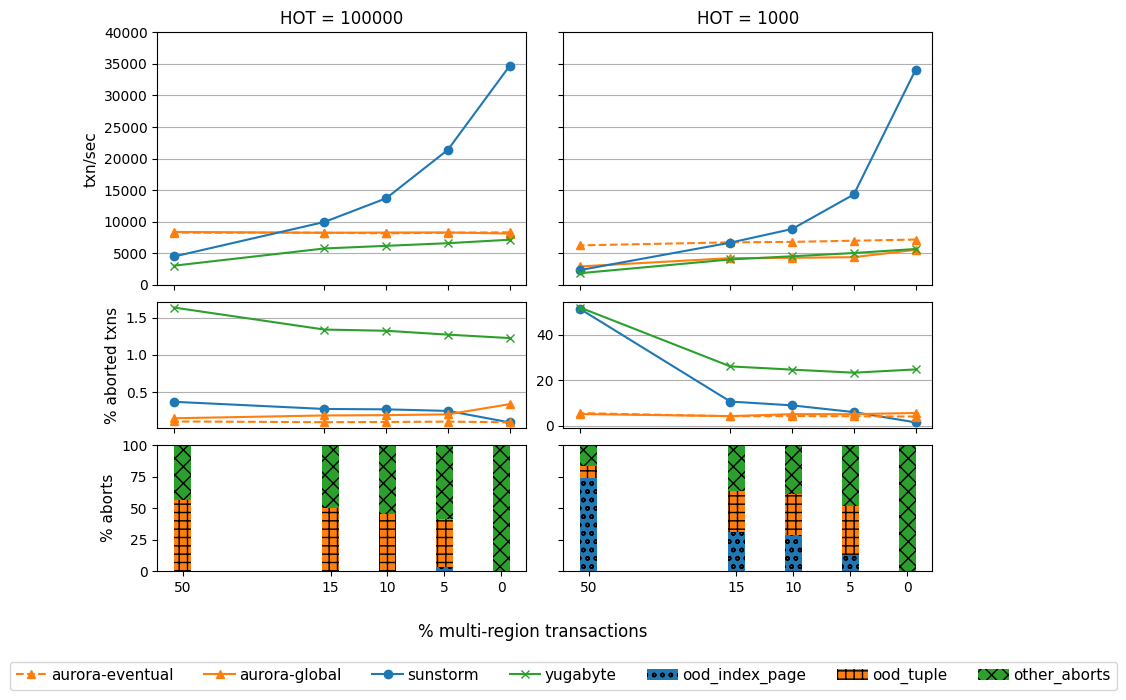

In [229]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

plt.rc('axes', labelsize=11) 
plt.rc('legend', fontsize=11)

xticks = [0, 5, 10, 15, 50]
xticklabels = [0, 5, 10, 15, 50]
legend_handles = []
legend_labels = []
abort_colors = ["C0", "C1", "C2"]
abort_patterns = ["oo", "++", "xx"]



fig = plt.figure(figsize=(10, 7))
gs = GridSpec(3, 2, figure=fig, height_ratios=[4, 2, 2], wspace= 0.1, hspace=0.1)

for h,hot in enumerate([100000, 1000]):
    ax = plt.subplot(gs[0, h])
    hot_throughput_df = throughput_df[throughput_df.hot == hot]
    hot_throughput_df.pivot_table(
        index=["mr"], columns=["system"], values="throughput", aggfunc="sum"
    ).plot(
        ax=ax,
        title=f"HOT = {hot}",
        ylabel="txn/sec",
        style=["^--", "^-", "o-", "x-"],
        color=["C1", "C1", "C0", "C2"],
        ylim=(0, 40000),
        # logy = True,
        rot=0,
        legend=False,
    )
    ax.set_xscale("symlog", linthresh=20)
    ax.set_xticks(xticks)
    ax.set_xticklabels([])
    ax.margins(x=0.05)
    ax.grid(axis="y")
    ax.invert_xaxis()
    ax.set_xlabel("")
    
    if h == 1:
        handles, labels = ax.get_legend_handles_labels()
        legend_handles += handles
        legend_labels += labels
        ax.set_yticklabels([])
        ax.set_ylabel("")
    

    ax = plt.subplot(gs[1, h]) 

    error_df.unstack(level=1)["pct"].loc[hot][SYSTEMS]\
        .set_index(np.array(xticks))\
        .plot(
            ax=ax,
            ylabel="% aborted txns",
            style=["o-", "^-", "^--", "x-"],
            color=["C0", "C1", "C1", "C2"],
            rot=0,
            legend=False,
        )

    ax.set_xscale("symlog", linthresh=20)
    ax.set_xticks(xticks)
    ax.set_xticklabels([])
    ax.margins(x=0.05)
    ax.grid(axis="y")
    ax.invert_xaxis()
    ax.get_yaxis().set_major_formatter(ScalarFormatter())
    if h == 1:
        ax.set_ylabel("")   

    xticks_hack = [0, 5, 10, 15, 28]
    ax = plt.subplot(gs[2, h])
    sunstorm_error_df = error_df.loc[(hot, "sunstorm",)].copy()
    error_columns_pct = [f"{col}" for col in error_columns]
    bottom = None
    for col, color, pattern in zip(error_columns_pct, abort_colors, abort_patterns):
        error = sunstorm_error_df[col] / sunstorm_error_df["pct"] * 100
        ax.bar(
            xticks_hack,
            error,
            bottom=bottom,
            label=col,
            width=1.5,
            facecolor=color,
            hatch=pattern,
        )
        if bottom is None:
            bottom = error
        else:
            bottom += error
    ax.set_ylim(0, 100)
    ax.margins(x=0.05)
    ax.set_xticks(xticks_hack)
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel("% aborts")
    ax.invert_xaxis()
    if h == 1:
        handles, labels = ax.get_legend_handles_labels()
        legend_handles += handles
        legend_labels += labels
        ax.set_ylabel("")
        ax.set_yticklabels([])

fig.supxlabel("% multi-region transactions")
plt.legend(legend_handles, legend_labels, ncol=7, loc='lower center', handletextpad=0.3,
           bbox_to_anchor=(0,-1)) 


    #plt.savefig(f"output/micro-throughput-hot{hot}.pdf", bbox_inches="tight")
    

# Latency


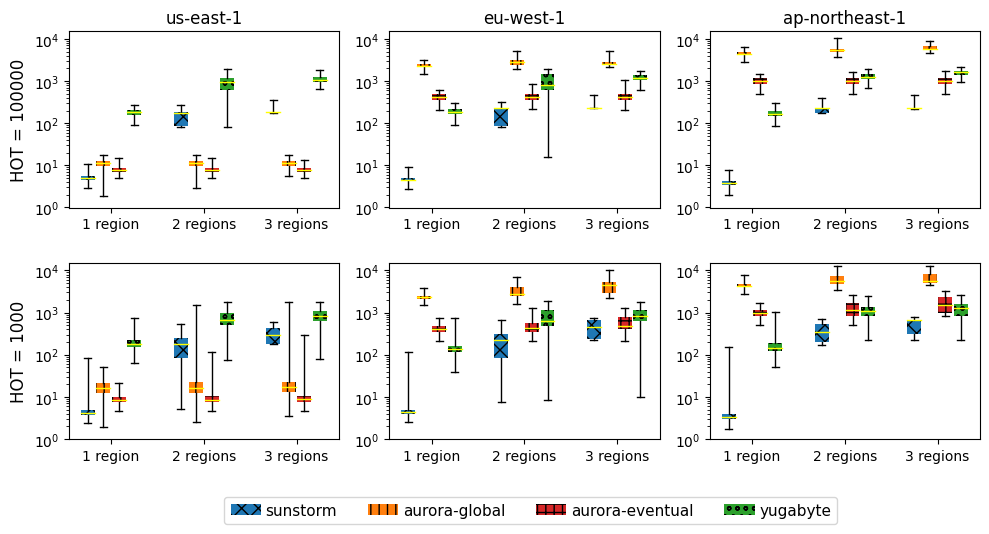

In [262]:
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(10, 5))
gs = GridSpec(2, 3, figure=fig)

plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

labels = [
    "1 region\n",
    "2 regions\n",
    "3 regions\n",
]
ticks = np.arange(len(labels))

width = 0.5

def to_box(df, n):
    def extract(col_name):
        col = df[col_name]
        col = col[col.notna()]
        assert len(col) == 1, f"Exactly one value expected, but {col_name} =\n{col}"
        return col.iloc[0]

    return {
        'whislo': extract(f"p0.WorkloadF{n}"),
        'q1': extract(f"p25.WorkloadF{n}"),
        'med': extract(f"p50.WorkloadF{n}"),
        'q3': extract(f"p75.WorkloadF{n}"),
        'whishi': extract(f"p99.WorkloadF{n}"),
        'fliers': []
    }

legends = []
patterns = ["xx", "||", "++", "oo"]
colors = ["C0", "C1", "C3", "C2"]

for h, hot in enumerate([100000, 1000]):
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = hot
    for r, region in enumerate(["1-us-east-1", "2-eu-west-1", "3-ap-northeast-1"]):
        region_df = hot_df[hot_df.region.str.startswith(region)]

        ax = plt.subplot(gs[h, r])
        for i, system in enumerate(SYSTEMS):
            system_df = region_df[region_df.system == system]
            boxes = [
                to_box(system_df[system_df.mr == 5], 1),
                to_box(system_df[system_df.mr == 5], 2),
                to_box(system_df[system_df.mr == 5], 3),
            ]
            comps = ax.bxp(
                boxes,
                positions=ticks - width / 2 + i * width / (len(SYSTEMS) - 1),
                showfliers=False,
                manage_ticks=False,
                patch_artist=True,
                widths=0.15,
                boxprops={
                    "facecolor": colors[i],
                    "linewidth": 0,
                    "hatch": patterns[i],
                },
                medianprops={
                    "color": "yellow",
                    "linewidth": 1,
                },
            )
            if (h==0 and r==0):
                legends.append(comps["boxes"][0])
            # legends.append(comps["boxes"][0])

        # ax.legend(legends, SYSTEMS, ncol=3)


        ax.set_xticks(labels=labels, ticks=ticks)
        ax.set_yscale("log")
        ax.set_ylim(0.99, 15000)
        # ax.set_ylabel("latency (ms)")
        # ax.grid()
        if h == 0:
            ax.set_title(region[2:])

        if r == 0:
            ax.set_ylabel(f"HOT = {hot_label}")
        # ax.set_title(f"HOT = {hot_label} ({region[2:]})")

fig.legend(legends, SYSTEMS, ncol=4, bbox_to_anchor=(0.85, 0.01), handletextpad=0.3)
fig.tight_layout()
fig.savefig("./ycsb-latency.pdf", bbox_inches="tight")


In [27]:
def plot_latency(mr, hot):
    # Remove the "-0" suffix in region name
    throughput_df['region'] = throughput_df['region'].str.replace(r'-0', '', regex=True)
    regions = sorted([r for r in set(throughput_df.region.unique()) if not r.endswith("-0")])
    for system in throughput_df.system.unique():
        fig, axes = plt.subplots(1, len(regions), figsize=(20, 4), sharey=True)
        fig.suptitle(f"{system}, hot = {hot}, mr = {mr}%")
        workload_df = throughput_df[
            (throughput_df.system == system)
            & (throughput_df.mr == mr)
            & (throughput_df.hot == hot)
        ]
        # Plot for each region
        for i, region in enumerate(regions):
            region_df = workload_df[workload_df.region.str.startswith(region)]
            if region_df.empty:
                continue
            # Seperate the tran sactions by the number of regions they access
            max_nregion = 3
            index = range(1, max_nregion + 1)
            nregion_latency_df = {
                "p0": [region_df[f"p0.WorkloadF{n}"].iloc[0] for n in index],
                "p25": [region_df[f"p25.WorkloadF{n}"].iloc[0] for n in index],
                "p50": [region_df[f"p50.WorkloadF{n}"].iloc[0] for n in index],
                "p75": [region_df[f"p75.WorkloadF{n}"].iloc[0] for n in index],
                "p95": [region_df[f"p95.WorkloadF{n}"].iloc[0] for n in index],
                "p99": [region_df[f"p99.WorkloadF{n}"].iloc[0] for n in index],
            }
            pd.DataFrame(nregion_latency_df, index=index).plot.bar(
                title=region,
                ylabel="latency (ms)",
                ax=axes[i],
                rot=0,
                ylim=(1, 1200),
                logy=True,
            )
            axes[i].set_xlabel("number of regions")
            axes[i].grid(axis="y")
        plt.tight_layout()

/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:318: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for t in axis.get_majorticklabels():


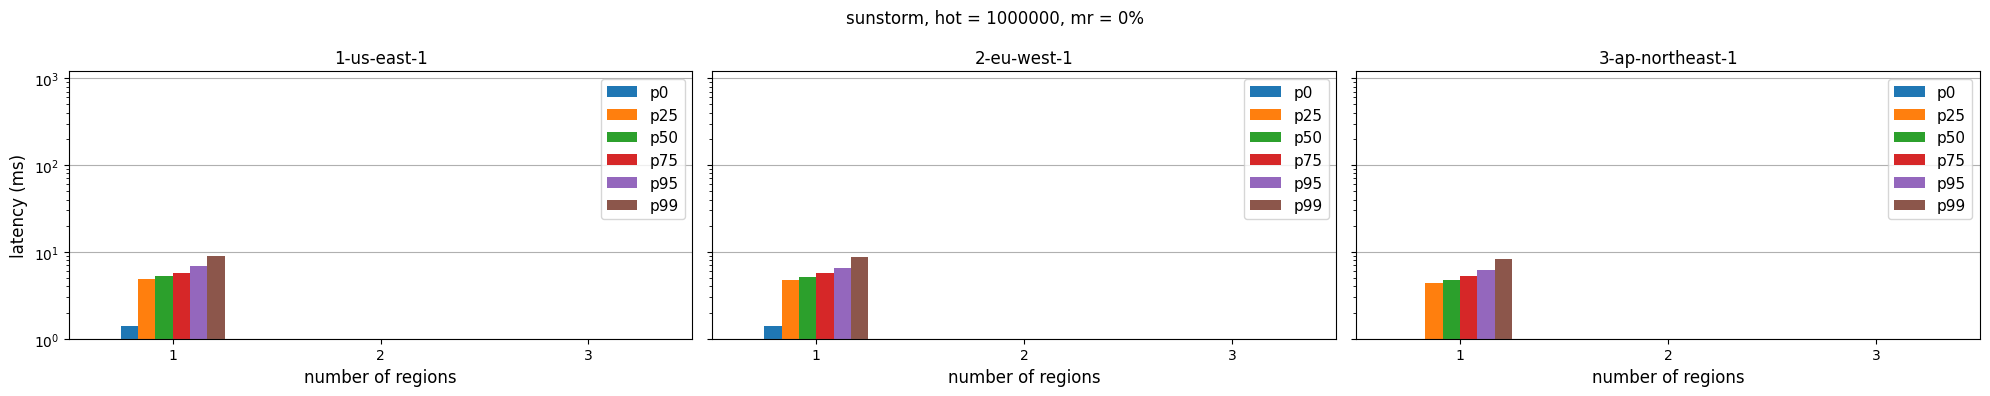

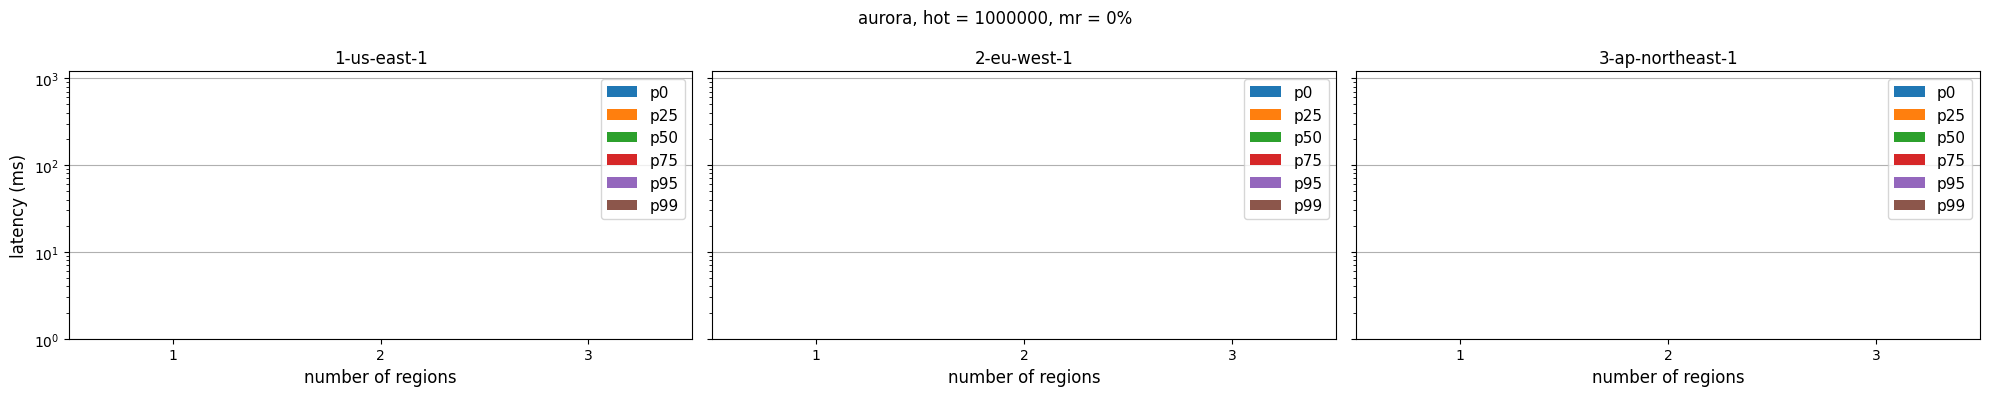

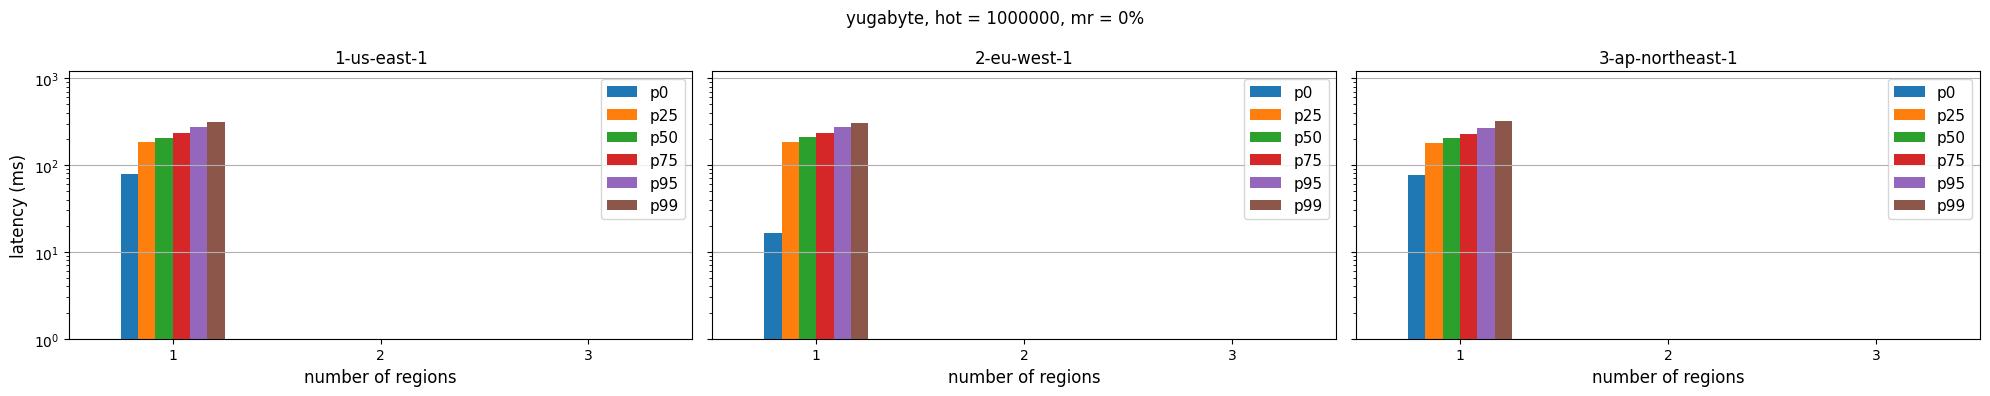

In [28]:
plot_latency(0, 1000000)

/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:318: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for t in axis.get_majorticklabels():


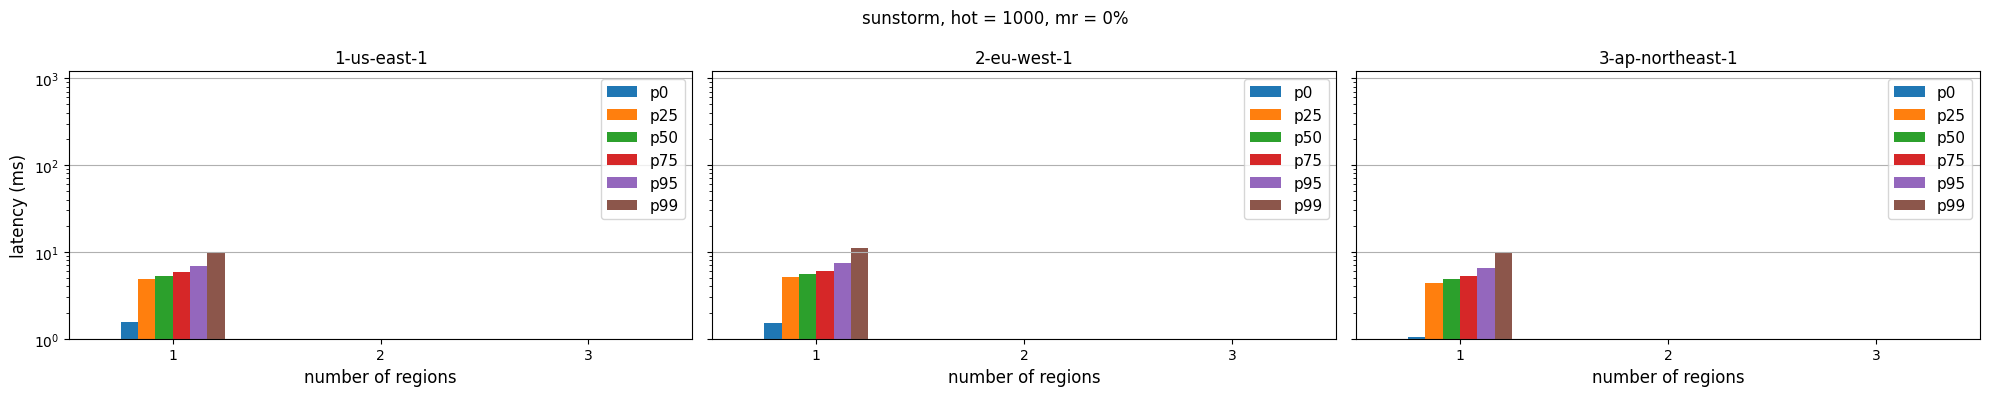

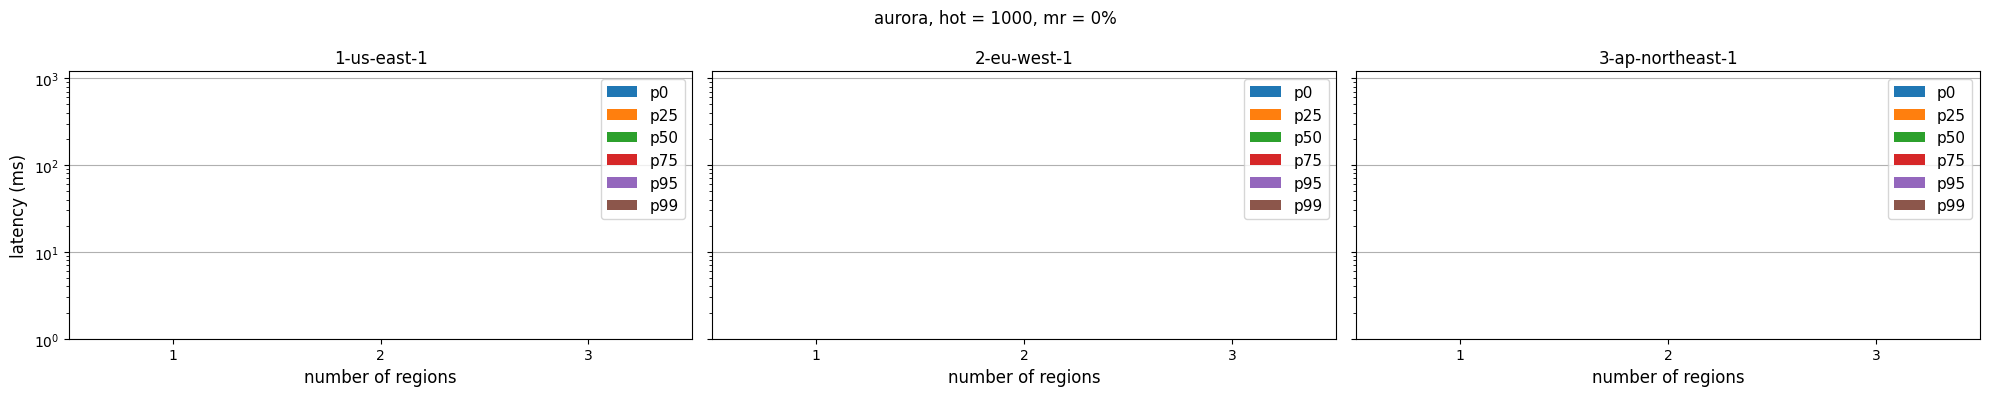

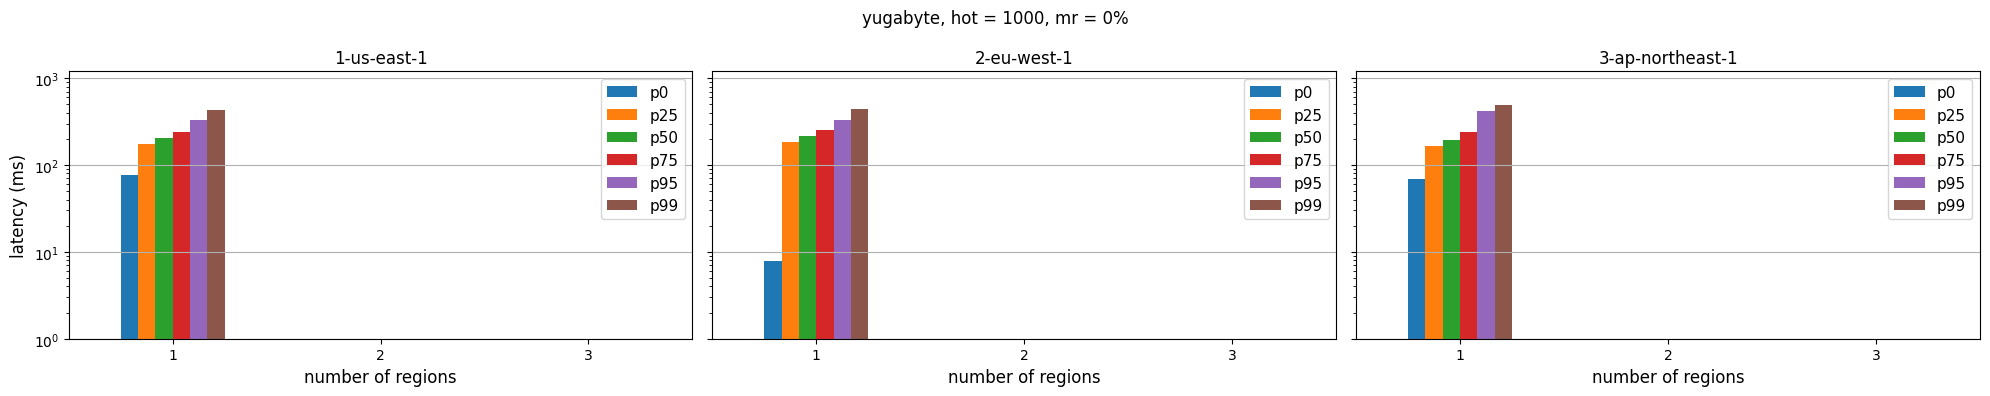

In [29]:
plot_latency(0, 1000)

/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:318: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for t in axis.get_majorticklabels():


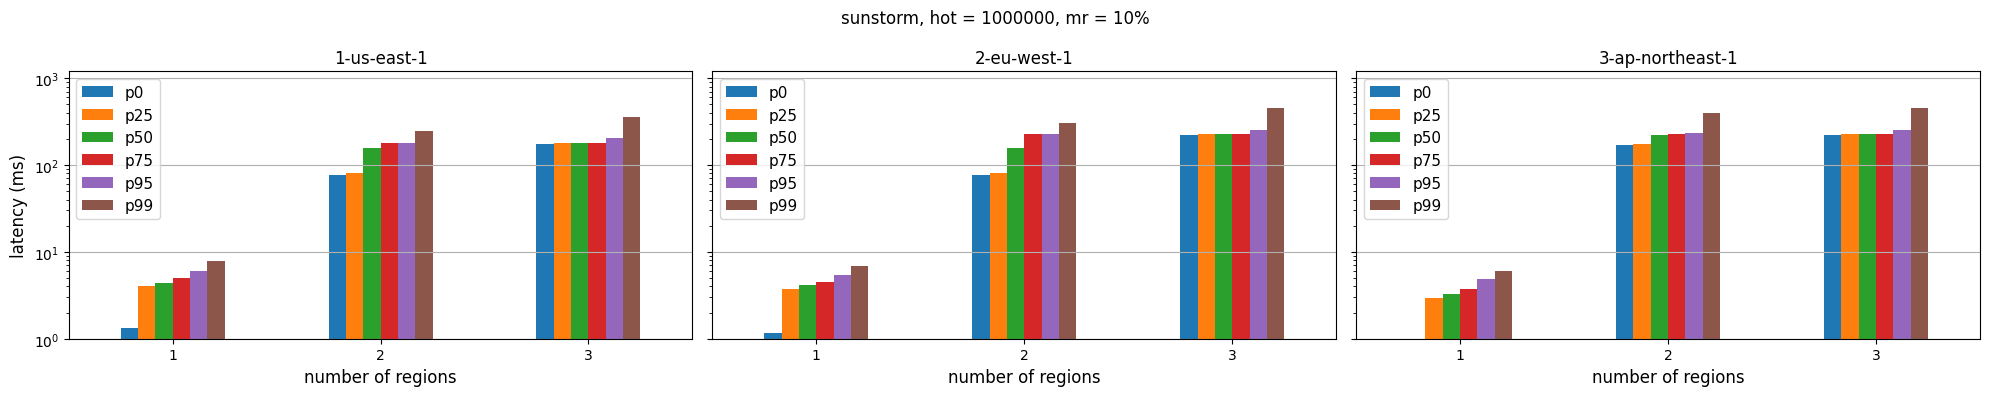

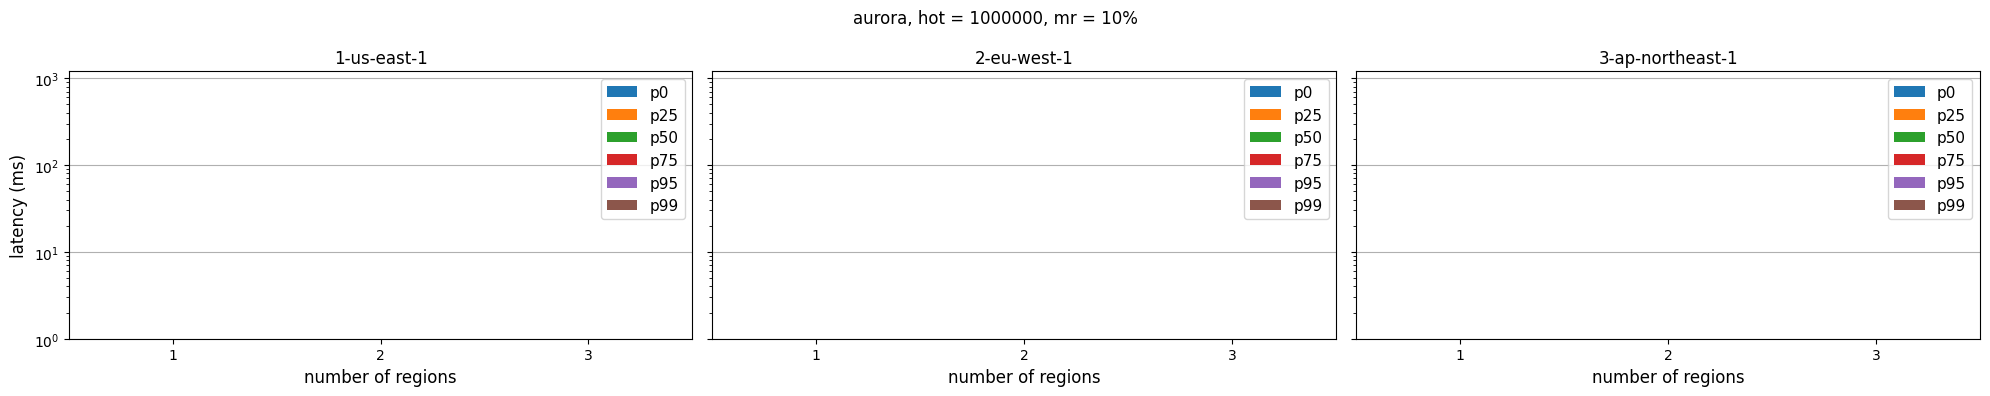

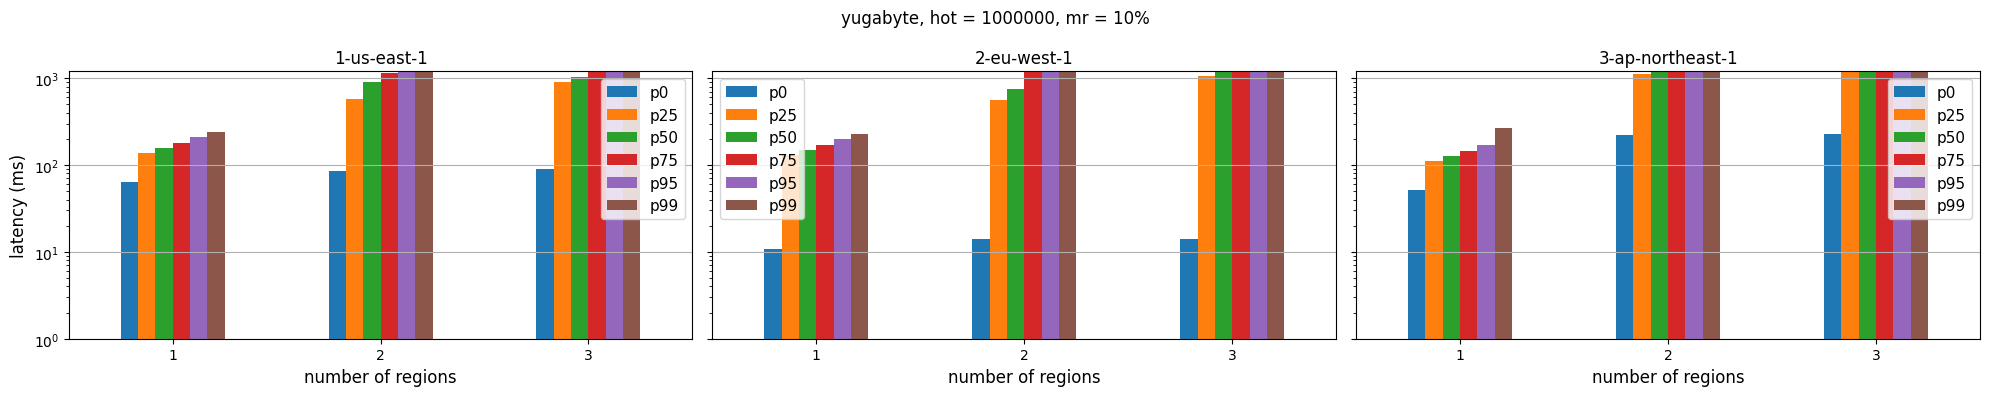

In [30]:
plot_latency(10, 1000000)

/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:318: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for t in axis.get_majorticklabels():


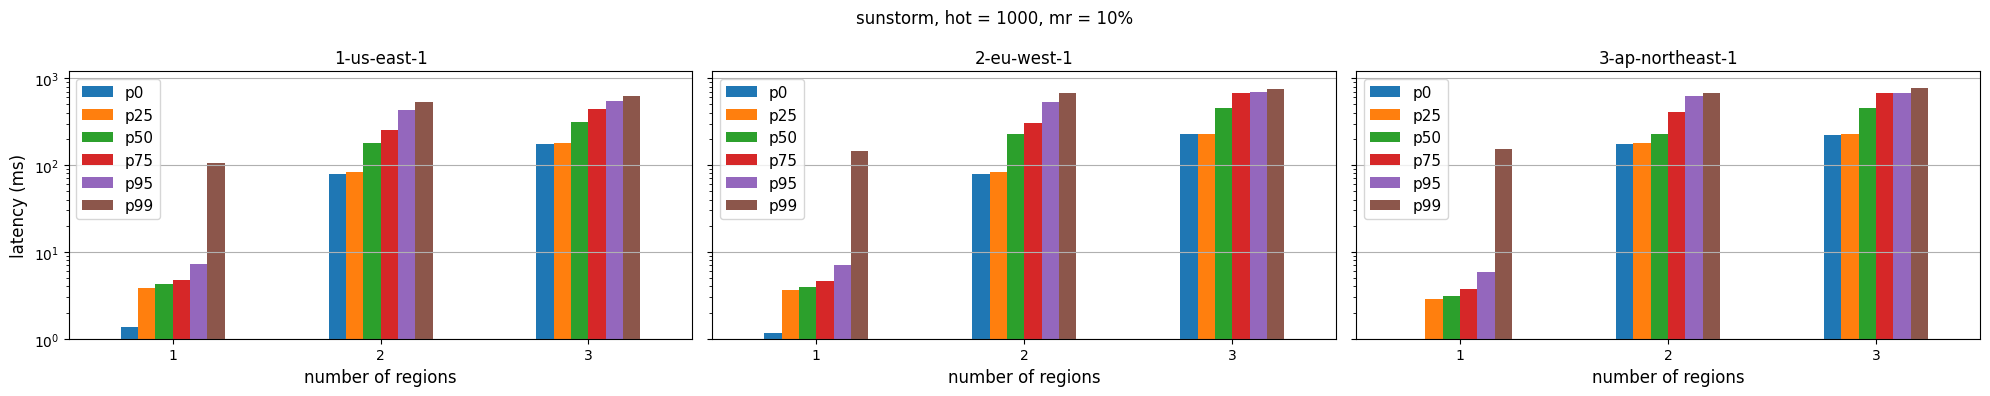

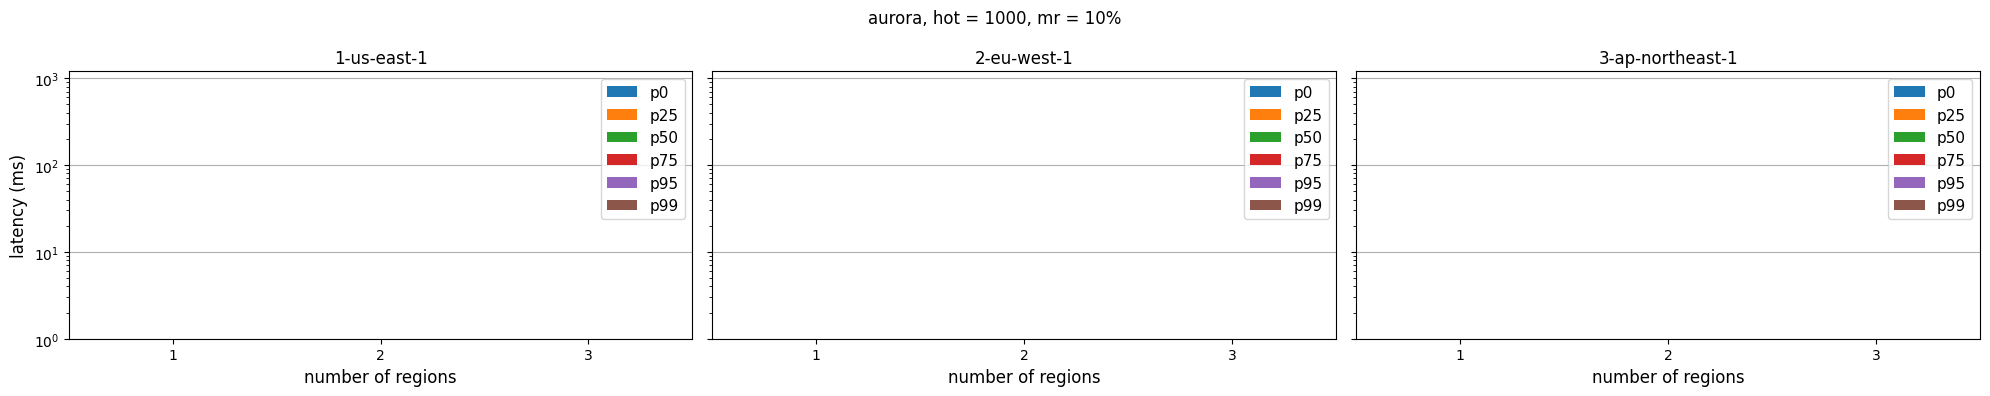

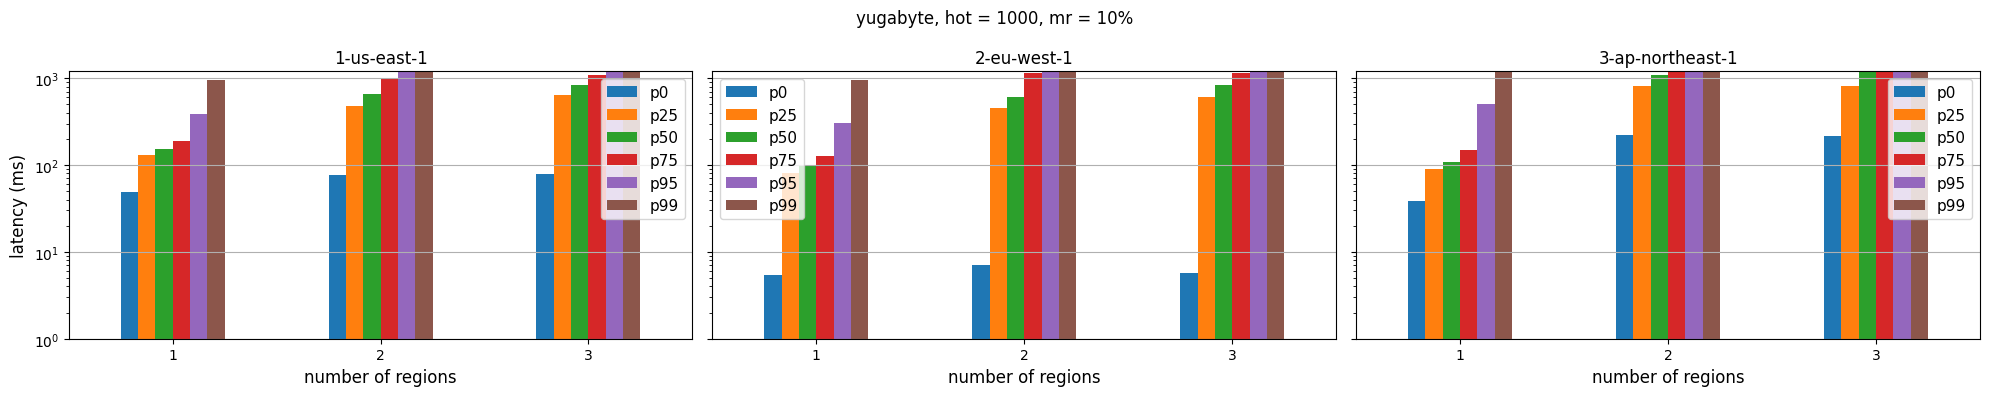

In [31]:
plot_latency(10, 1000)

/opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:318: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for t in axis.get_majorticklabels():


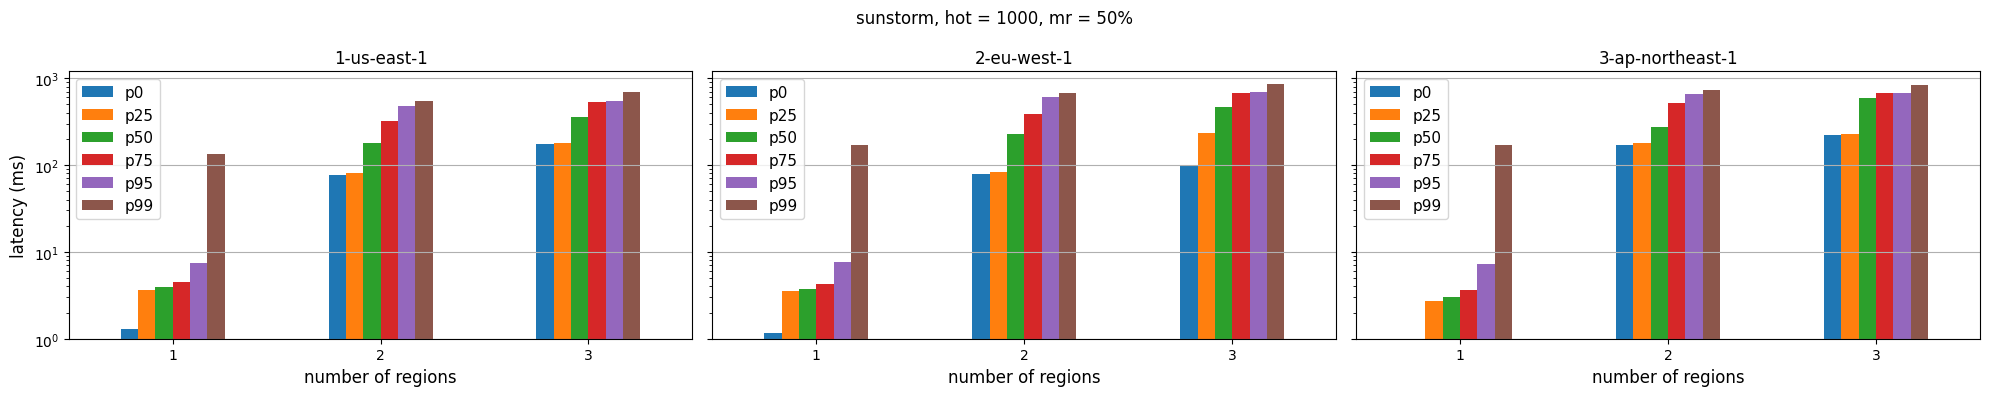

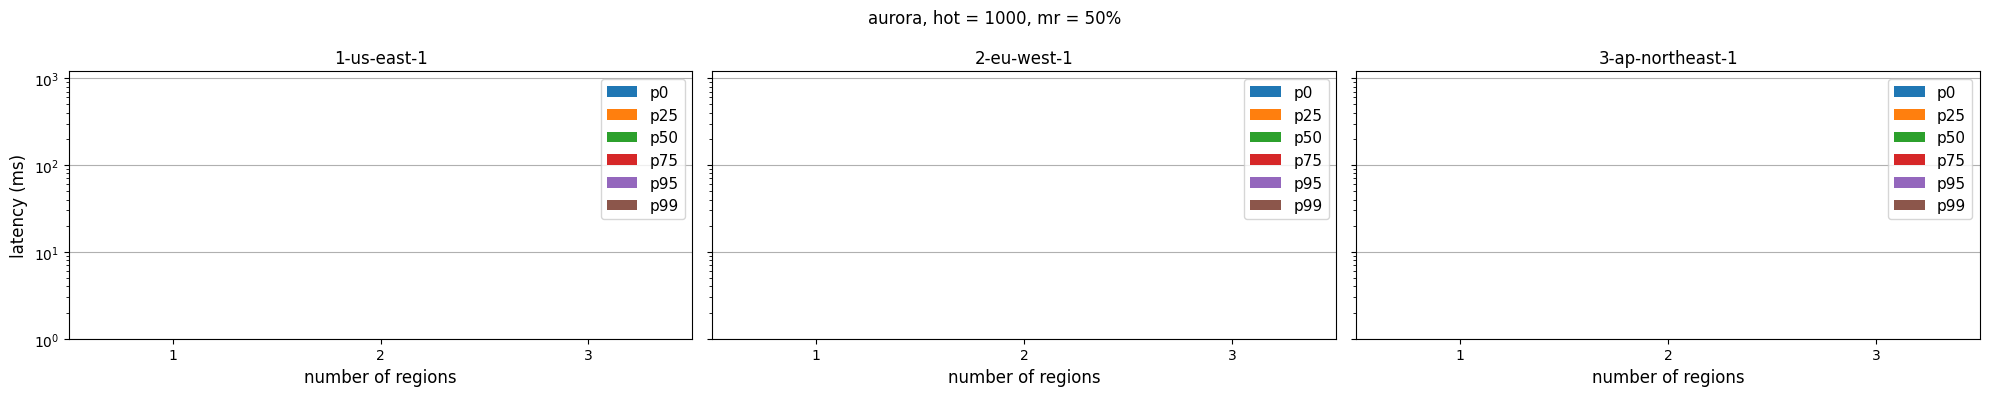

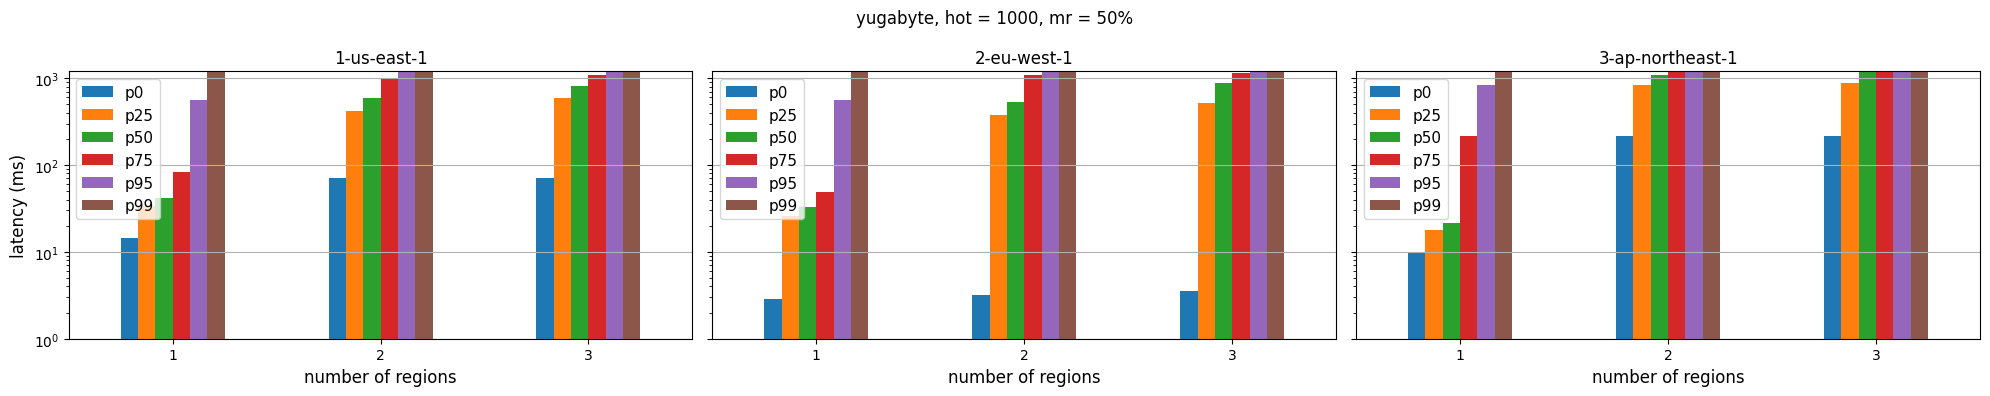

In [32]:
plot_latency(50, 1000)

In [251]:
yugabyte_throughput_df[(yugabyte_throughput_df.mr==0) & (yugabyte_throughput_df.region=='2-eu-west-1-0') & (yugabyte_throughput_df.hot==100000)]

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,rejected.WorkloadF2,rejected.WorkloadF3,...,avg.WorkloadF3,p0.WorkloadF3,p25.WorkloadF3,p50.WorkloadF3,p75.WorkloadF3,p90.WorkloadF3,p95.WorkloadF3,p99.WorkloadF3,p100.WorkloadF3,system
52,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,2-eu-west-1-0,100000,F,0,20240501-110250,2689,2689,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yugabyte


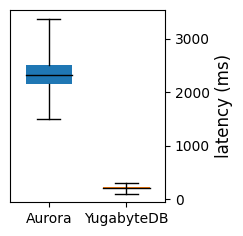

In [254]:
fig, ax = plt.subplots(figsize=(2, 2.5))

medianprops = dict(linestyle='-', linewidth=1, color='black')


aurora_eu_df = aurora_throughput_df[(aurora_throughput_df.mr==0) & (aurora_throughput_df.region=='2-eu-west-1-0') & (aurora_throughput_df.hot==100000)]
ax.bxp(
    [to_box(aurora_eu_df, 1)],
    positions=[0],
    patch_artist=True,
    widths=0.6,
    boxprops={
        "facecolor": "C0",
        "linewidth": 0,
    },
    medianprops=medianprops,
)

yugabyte_eu_df = yugabyte_throughput_df[(yugabyte_throughput_df.mr==0) & (yugabyte_throughput_df.region=='2-eu-west-1-0') & (yugabyte_throughput_df.hot==100000)]
ax.bxp(
    [to_box(yugabyte_eu_df, 1)],
    positions=[1],
    patch_artist=True,
    widths=0.6,
    boxprops={
        "facecolor": "C1",
        "linewidth": 0,
    },
    medianprops=medianprops,
)

ax.set_ylabel('latency (ms)')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels(["Aurora", "YugabyteDB"])
plt.savefig('intro-latency.pdf', bbox_inches='tight')